#  Exploratory Data Analysis

## Introduction
Dans le cadre de la certification RNCP38616 - Bloc 03 et Bloc 05, le projet final est un outil IA pour gérer les tickets de support IT d'un HelpDesk pour le secteur du Retail.  
Le dataset retenu pour le bloc 03 (Machine Learning) est "Support Ticket Priority Dataset (50K)".  
https://www.kaggle.com/datasets/albertobircoci/support-ticket-priority-dataset-50k/data  
Il faudra sélectionner le meilleur modèle ML qui permettra la classification de la priorité des tickets de support, de préparer et transformer les données afin d'entraîner celui-ci.  
Voici l'EDA proposée pour ce dataset.

## Objectif
- Comprendre les données
- Développer une première stratégie de modélisation

## Checklist de base
#### Analyse de Forme :
-  Variable target : priority_cat
-  Lignes et colonnes : (50000, 33)
-  Types de variables : qualitatives : 10, quantitatives : 22
-  Analyse des valeurs manquantes : customer_sentiment (texte) n'a pas été rempli pour certains tickets car optionnel.


## Remarques
-  ticket_id ne nous interesse pas
-  Certaines colonnes semblent fonctionner par 'paires' d'après leur nom.  
   Exemple : company_size (catégorielle) // company_size_cat (numerique).  
   => Vérifier afin de simplifier le dataset plus tard.


#### Analyse de Fond :
-  Elimination des colonnes inutiles : 10 colonnes sont à éliminer + ticket_id
-  Visualisation de la target :  
   priority : low = 50% - medium = 35% - high = 15%  
   => déséquilibre des classes => optimisation par validation croisée (?)
-  Signification des variables :  
   -  Variables non standardisées et déséquilibrées
   -  majorité des descriptions entre 300 et 450 mots (cf DL)
-  Identification des Outliers : boites à moustaches -> de nombreuses features comportent des outliers.  
   Il faudra certainement utiliser un modèle dit 'robuste'.

-  Relation Variables / Target :  
   -  Il existe des corrélations entre les variables catégorielles et la target :  
      petite compagnie, contrat 'basic', région APAC, secteur 'analytics' -> priority low  
      Ce qui est normal puisque c'est la classe la plus représentée.
   -  En rééquilibrant les classes, on comprends que :  
      large compagnie + fintech + contrat 'entreprise' + région AMER + secteur data_pipeline + raporté par un C level = Priorité élevée  
      Recommandations sales : offre personnalisée pour secteur fintech

## Conclusion  
Liste des variables retenues  
Features = ['day_of_week', 'company_id',	'company_size', 'industry', 'customer_tier', 'org_users', 'region',	'past_30d_tickets', 'past_90d_incidents', 'product_area', 'booking_channel', 'booking_channel', 'reported_by_role', 'customers_affected'	'error_rate_pct', 'downtime_min', 'payment_impact_flag', 'security_incident_flag', 'data_loss_flag', 'has_runbook',	'customer_sentiment',	'description_length', 'priority']  
Target = ['priority']


# URL du Dataset
DATASET_URL = https://www.kaggle.com/datasets/albertobircoci/support-ticket-priority-dataset-50k/data

# Installation des librairies

In [1]:
#%pip install -q kagglehub pandas seaborn matplotlib numpy

# Import des librairies

In [2]:
from src.data_loader import load_data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniconda/base/envs/ml-env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Download et Chargement des données

In [3]:
data = load_data()
data.head()

,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,...,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
0,1000000000,Wed,3,100015,Small,1,media,7,Basic,1,...,6,0,0,0,0,neutral,2,227,low,1
1,1000000001,Sat,6,100023,Small,1,healthcare,5,Basic,1,...,2,0,0,0,0,neutral,2,461,low,1
2,1000000002,Mon,1,100012,Small,1,gaming,4,Basic,1,...,0,0,0,0,1,positive,3,306,low,1
3,1000000003,Wed,3,100003,Small,1,media,7,Plus,2,...,16,0,0,0,1,neutral,2,363,medium,2
4,1000000004,Mon,1,100019,Small,1,ecommerce,2,Plus,2,...,6,0,0,0,0,neutral,2,442,low,1


In [4]:
df = data.copy()
df.info()
df.shape
df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ticket_id               50000 non-null  int64  
 1   day_of_week             50000 non-null  object 
 2   day_of_week_num         50000 non-null  int64  
 3   company_id              50000 non-null  int64  
 4   company_size            50000 non-null  object 
 5   company_size_cat        50000 non-null  int64  
 6   industry                50000 non-null  object 
 7   industry_cat            50000 non-null  int64  
 8   customer_tier           50000 non-null  object 
 9   customer_tier_cat       50000 non-null  int64  
 10  org_users               50000 non-null  int64  
 11  region                  50000 non-null  object 
 12  region_cat              50000 non-null  int64  
 13  past_30d_tickets        50000 non-null  int64  
 14  past_90d_incidents      50000 non-null

int64      22
object     10
float64     1
Name: count, dtype: int64

# Valeurs manquantes
on constate ci-dessus que la colonne 'customer_sentiment' est incomplete tandis que 'customer_sentiment_cat' qui semble être son pendant encodé ne l'est pas.  
L'information semble optionnelle puisque NaN pour cette colonne correspond à 0.  
Pour le preprocessing de cette colonne, on choisira la strategy='median', cad 'neutral'.

In [5]:
# Afficher le mapping unique entre customer_sentiment (texte) → customer_sentiment_cat (cat)
pairs = df[['customer_sentiment','customer_sentiment_cat']].drop_duplicates().sort_values(by=['customer_sentiment_cat','customer_sentiment'])
for _, row in pairs.iterrows():
    print(f"- sentiment: {row['customer_sentiment']!r} -> customer_sentiment_cat: {row['customer_sentiment_cat']}")

# Charger la première ligne qui n'a pas de valeur dans la colonne 'customer_sentiment'
# pour vérifier.
df[df['customer_sentiment'].isna()].head(1)

- sentiment: nan -> customer_sentiment_cat: 0
- sentiment: 'negative' -> customer_sentiment_cat: 1
- sentiment: 'neutral' -> customer_sentiment_cat: 2
- sentiment: 'positive' -> customer_sentiment_cat: 3


,ticket_id,day_of_week,day_of_week_num,company_id,company_size,company_size_cat,industry,industry_cat,customer_tier,customer_tier_cat,...,downtime_min,payment_impact_flag,security_incident_flag,data_loss_flag,has_runbook,customer_sentiment,customer_sentiment_cat,description_length,priority,priority_cat
12,1000000012,Thu,4,100007,Large,3,media,7,Enterprise,3,...,0,0,0,0,1,NaN,0,556,medium,2


# Colonnes inutiles (redondantes)
- ticket_id

Colonnes suspectées d'être des doubles encodées :
-  ✔️ day_of_week // day_of_week_num 
-  ✔️ company_size // company_size_cat
-  ✔️ industry // industry_cat
-  ✔️ customer_tier // customer_tier_cat
-  ✔️ region // region_cat
-  ✔️ product_area // product_area_cat
-  ✔️ booking_channel // booking_channel_cat
-  ✔️ reported_by_role // reported_by_role_cat
-  ✔️ customer_sentiment // customer_sentiment_cat
-  ✔️ priority // priority_cat

In [6]:
# Afficher le mapping unique entre day_of_week (texte) → day_of_week_num (cat)
pairs = df[['day_of_week','day_of_week_num']].drop_duplicates().sort_values(by=['day_of_week_num','day_of_week'])
for _, row in pairs.iterrows():
    print(f"- day: {row['day_of_week']!r} -> day_of_week_num: {row['day_of_week_num']}")
# => day_of_week_num est bien un encodage numérique de day_of_week et pourra être supprimée.

- day: 'Mon' -> day_of_week_num: 1
- day: 'Tue' -> day_of_week_num: 2
- day: 'Wed' -> day_of_week_num: 3
- day: 'Thu' -> day_of_week_num: 4
- day: 'Fri' -> day_of_week_num: 5
- day: 'Sat' -> day_of_week_num: 6
- day: 'Sun' -> day_of_week_num: 7


In [7]:
# les colonnes suspectées d'être des doubles encodées, avec _cat suffixe.
suspect_columns = ['company_size', 'industry', 'customer_tier', 'region', 'product_area', 'booking_channel', 'reported_by_role', 'customer_sentiment', 'priority']
for col in suspect_columns:
    cat_column = col + '_cat'
    pairs = df[[col, cat_column]].drop_duplicates().sort_values(by=[cat_column, col])
    print(f"Mapping for {col} and {cat_column}:")
    for _, row in pairs.iterrows():
        print(f"- {col}: {row[col]!r} -> {cat_column}: {row[cat_column]}")
    print()
# => Colonnes inutiles

Mapping for company_size and company_size_cat:
- company_size: 'Small' -> company_size_cat: 1
- company_size: 'Medium' -> company_size_cat: 2
- company_size: 'Large' -> company_size_cat: 3

Mapping for industry and industry_cat:
- industry: 'fintech' -> industry_cat: 1
- industry: 'ecommerce' -> industry_cat: 2
- industry: 'saas_b2b' -> industry_cat: 3
- industry: 'gaming' -> industry_cat: 4
- industry: 'healthcare' -> industry_cat: 5
- industry: 'logistics' -> industry_cat: 6
- industry: 'media' -> industry_cat: 7

Mapping for customer_tier and customer_tier_cat:
- customer_tier: 'Basic' -> customer_tier_cat: 1
- customer_tier: 'Plus' -> customer_tier_cat: 2
- customer_tier: 'Enterprise' -> customer_tier_cat: 3

Mapping for region and region_cat:
- region: 'AMER' -> region_cat: 1
- region: 'EMEA' -> region_cat: 2
- region: 'APAC' -> region_cat: 3

Mapping for product_area and product_area_cat:
- product_area: 'auth' -> product_area_cat: 1
- product_area: 'billing' -> product_area_cat:

# Suppression des colonnes inutiles du dataframe

In [8]:
# NB : on conserve 'priority_cat' pour l'analyse
# Suppression des colonnes inutiles du dataframe si présentes
columns_todelete = ['ticket_id', 'day_of_week_num', 'company_size_cat', 'industry_cat', 'customer_tier_cat', 'region_cat', 'product_area_cat', 'booking_channel_cat', 'reported_by_role_cat', 'customer_sentiment_cat']
for col in columns_todelete:
    if col in df.columns:
        df = df.drop(col, axis=1)
df.shape

(50000, 23)

# Visualisation de la target

In [9]:
df['priority'].value_counts(normalize=True)

priority
low       0.50
medium    0.35
high      0.15
Name: proportion, dtype: float64

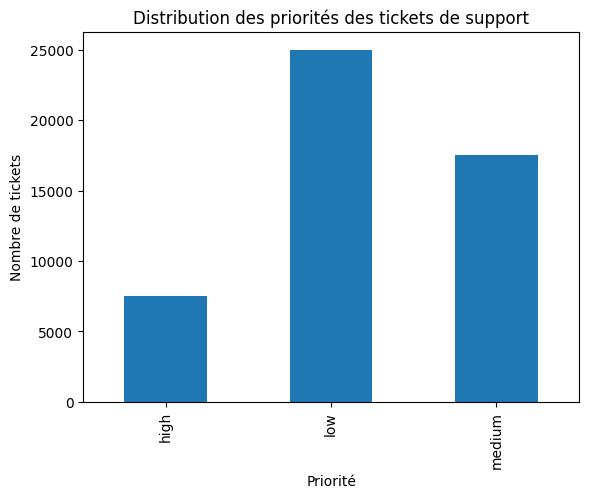

In [10]:
df['priority'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution des priorités des tickets de support')
plt.xlabel('Priorité')
plt.ylabel('Nombre de tickets')
plt.show()

# Signification des variables

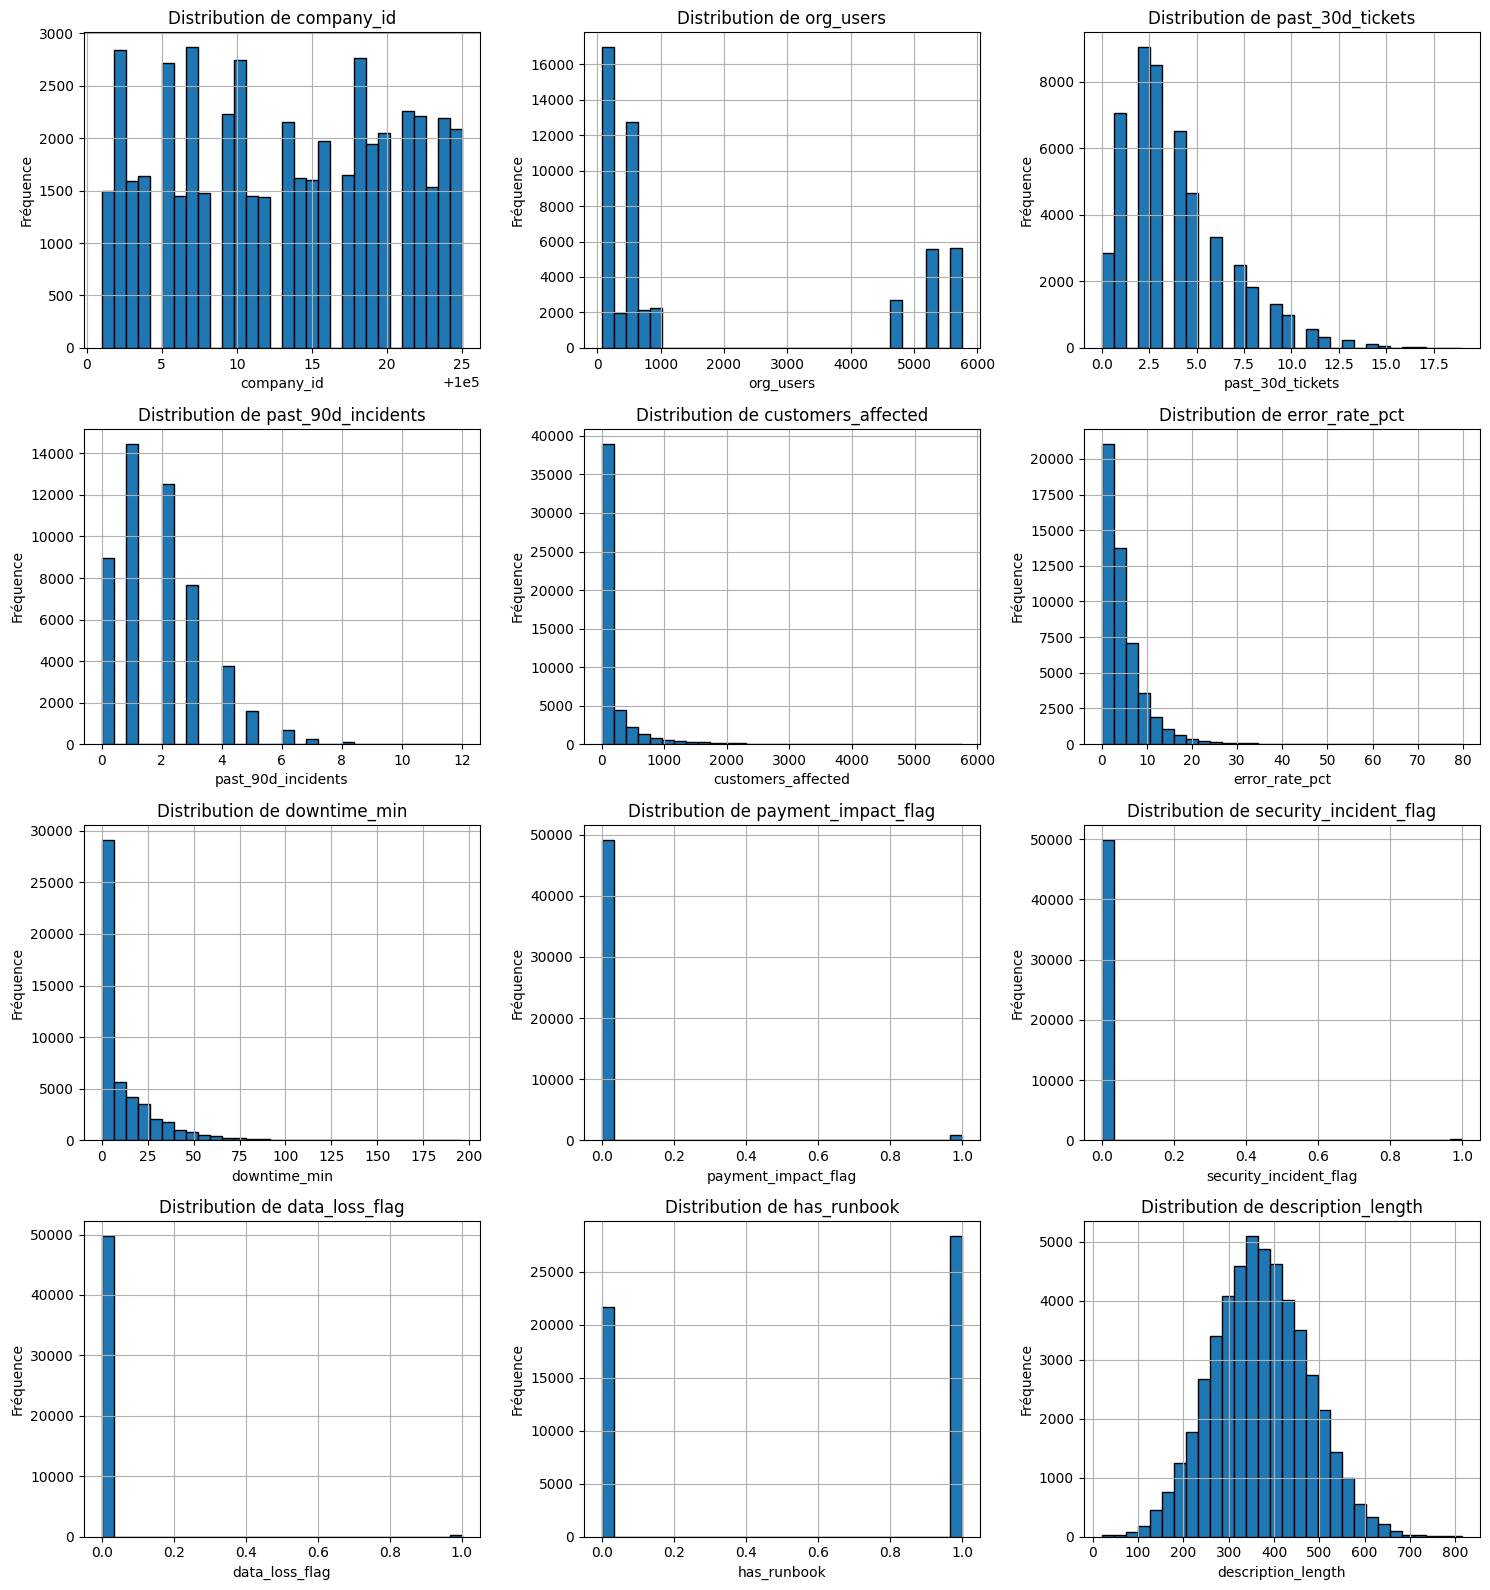

In [11]:
# histogrammes des valeurs quantitatives
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Retirer priority_cat de la liste car c'est la target
if 'priority_cat' in numeric_cols:
    numeric_cols.remove('priority_cat')

# Créer les histogrammes
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

for idx, col in enumerate(numeric_cols):
    df[col].hist(ax=axes[idx], bins=30, edgecolor='black')
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')

# Masquer les sous-graphiques vides
for idx in range(len(numeric_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()



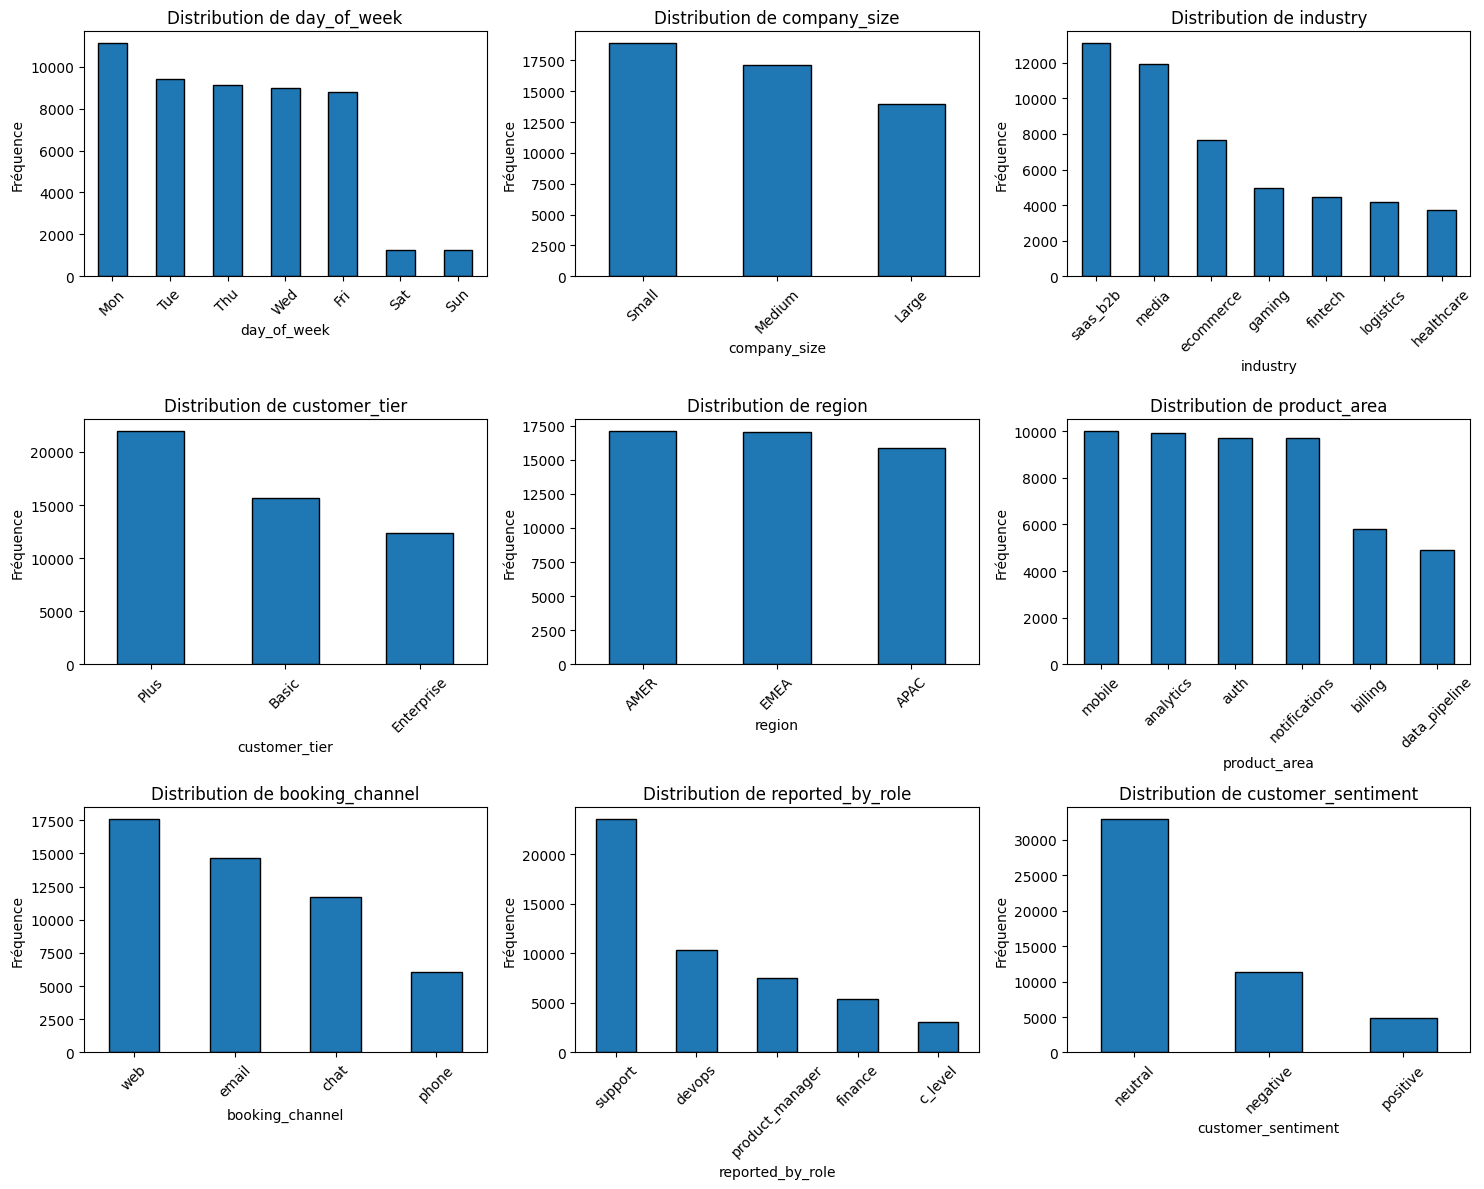

In [12]:
# histogrammes des valeurs catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Retirer priority de la liste car c'est la target
if 'priority' in categorical_cols:
    categorical_cols.remove('priority')

# Créer les graphiques
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

for idx, col in enumerate(categorical_cols):
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', ax=axes[idx], edgecolor='black')
    axes[idx].set_title(f'Distribution de {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Fréquence')
    axes[idx].tick_params(axis='x', rotation=45)

# Masquer les sous-graphiques vides
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Identification des Outliers : boxplots

['company_id', 'org_users', 'past_30d_tickets', 'past_90d_incidents', 'customers_affected', 'error_rate_pct', 'downtime_min', 'payment_impact_flag', 'security_incident_flag', 'data_loss_flag', 'has_runbook', 'description_length', 'priority_cat']


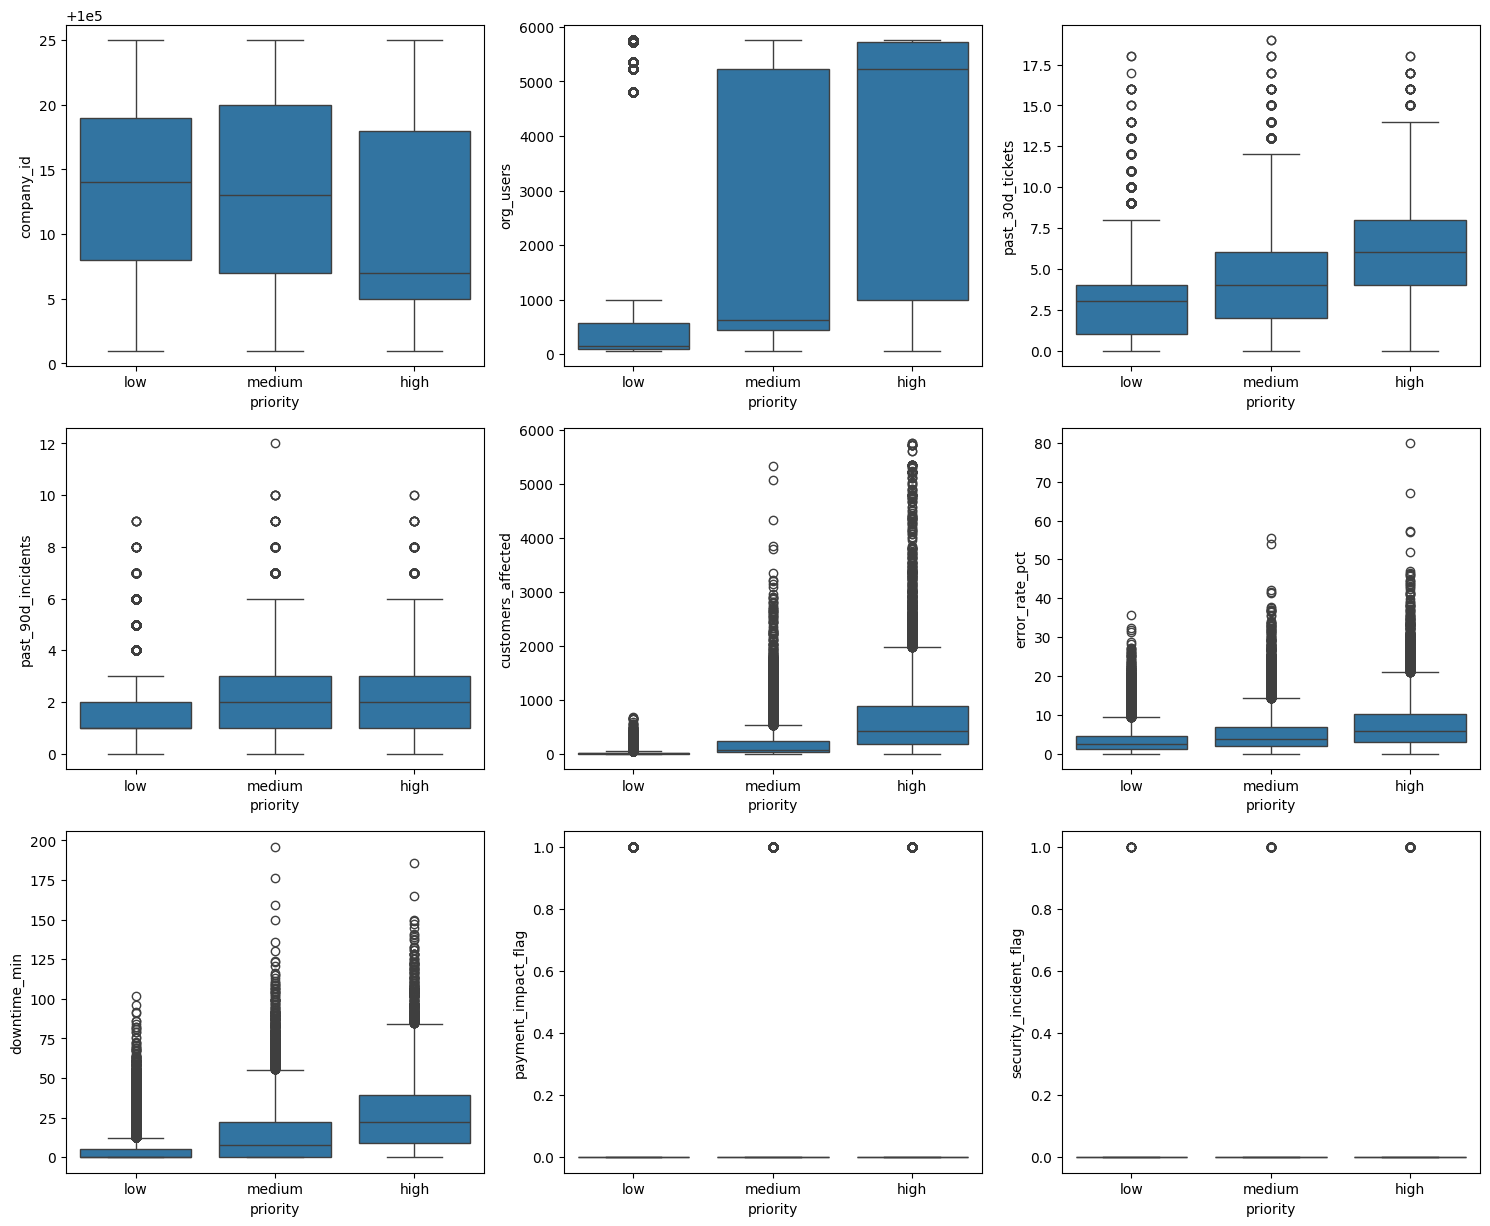

In [13]:
# Boxplots pour les variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)
# Retirer priority de la liste car c'est la target
if 'priority_cat' in categorical_cols:
    categorical_cols.remove('priority_cat')

# Créer les boxplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=df['priority'], y=df[col], ax=axes[idx])

# Masquer les sous-graphiques vides
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


# Relation Variables / Target

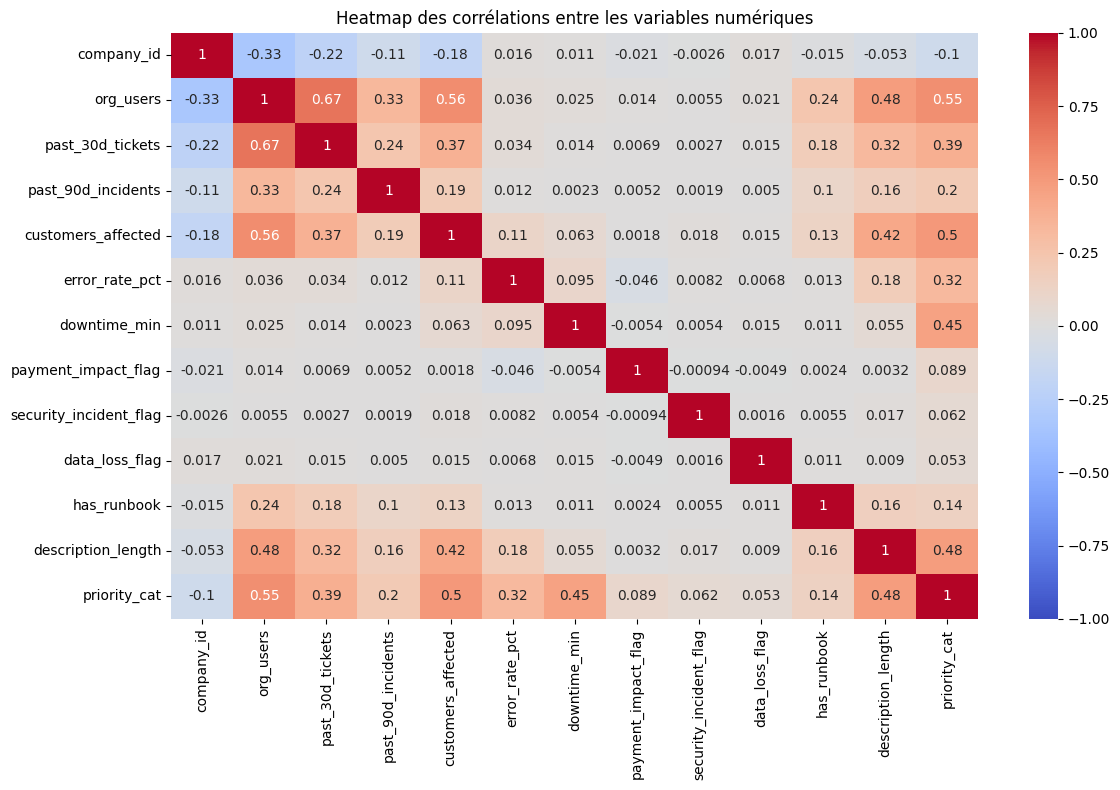

In [14]:
# heatmap des corrélations sur les variables numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr_matrix = df[numeric_cols].corr()

# Affichage de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Heatmap des corrélations entre les variables numériques")
plt.tight_layout()
plt.show()



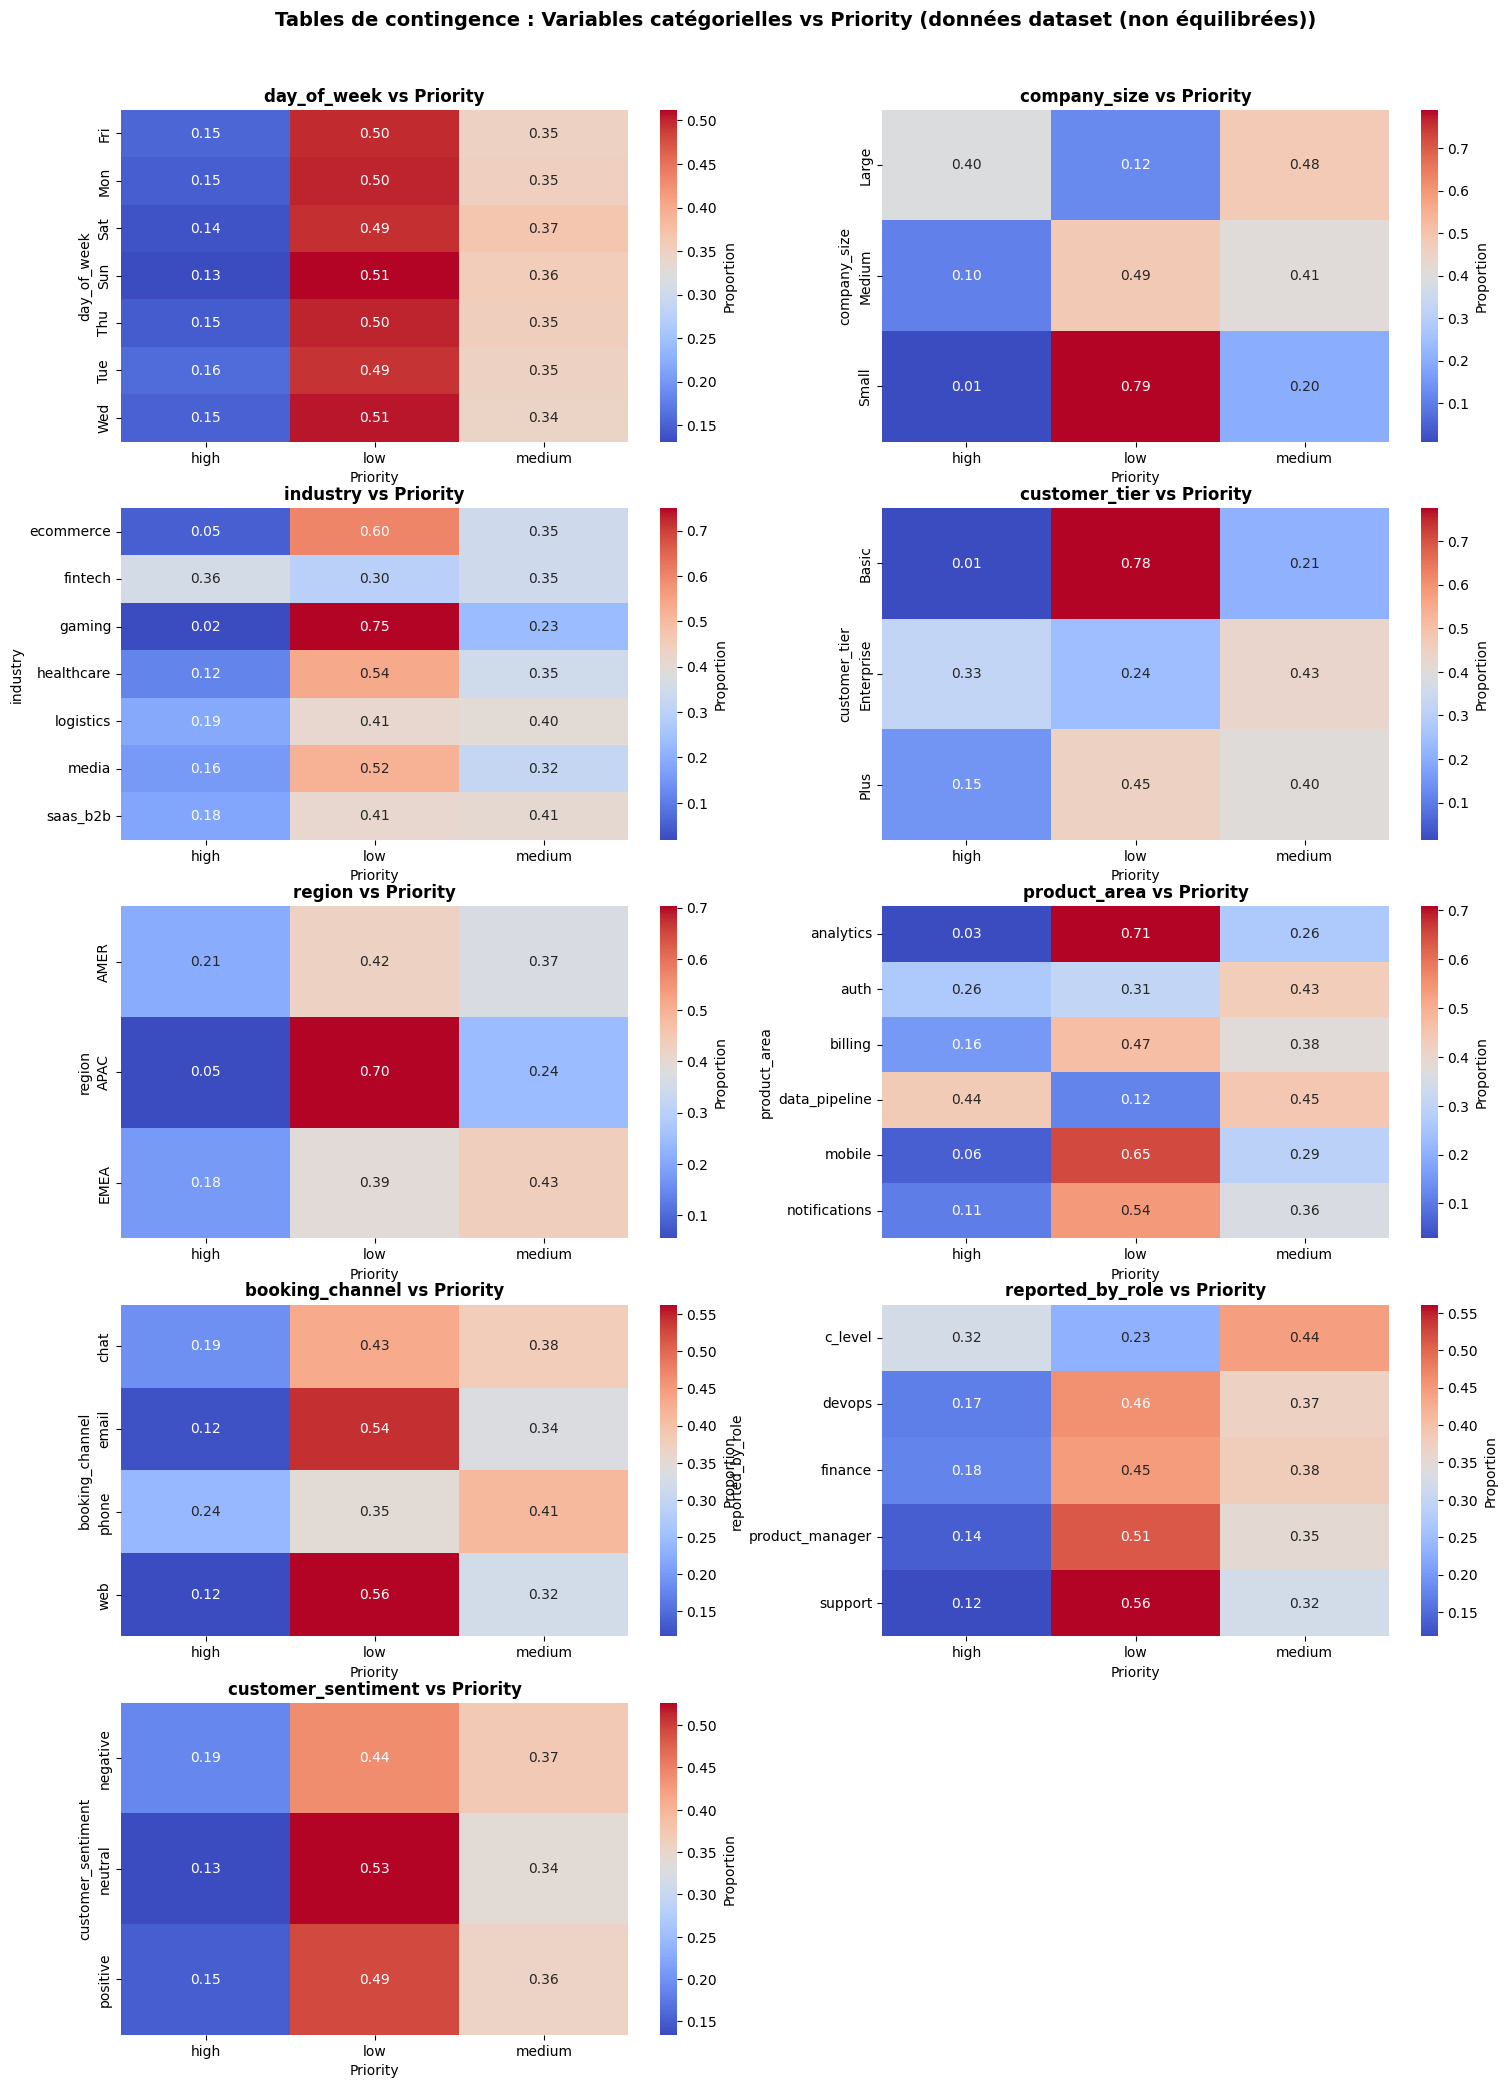

In [15]:
# Heatmaps avec tables de contingence : relation entre variables catégorielles et la target
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Retirer priority de la liste car c'est la target
if 'priority' in categorical_cols:
    categorical_cols.remove('priority')

# Créer les graphiques
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

for idx, col in enumerate(categorical_cols):
    # Créer la table de contingence
    crosstab = pd.crosstab(df[col], df['priority'], normalize='index')  # Normalisée par ligne (%)
    
    # Créer la heatmap
    sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='coolwarm', 
                ax=axes[idx], cbar_kws={'label': 'Proportion'})
    axes[idx].set_title(f'{col} vs Priority', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Priority', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].tick_params(axis='x', rotation=0)

plt.suptitle('Tables de contingence : Variables catégorielles vs Priority (données dataset (non équilibrées))', 
             fontsize=14, fontweight='bold', y=0.92)

# Masquer les sous-graphiques vides
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)



# Une dernière chose
En équilibrant les classes de priority (sous échantillonage de la classe majoritaire), on pourra mettre en évidence les associations sans biais du déséquilibre initial et créer de nouvelles heatmap.
Cela est fait pour faire comprendre aux consultants quelles sont les composantes d'un ticket 'prioritaire'.

In [16]:
# Équilibrage de la répartition des priority avant de créer les heatmaps
# Stratégie : sous-échantillonner pour avoir le même nombre de chaque priority

# Vérifier la distribution actuelle
print("Distribution originale des priority :")
print(df['priority'].value_counts())
print("\n")

# Trouver le nombre minimum de tickets par priority
min_count = df['priority'].value_counts().min()
print(f"Nombre minimum de tickets par priority : {min_count}")

# Créer un dataset équilibré
df_balanced = pd.DataFrame()

for priority_level in df['priority'].unique():
    subset = df[df['priority'] == priority_level]
    # Échantillonner aléatoirement le même nombre que la classe minoritaire
    if len(subset) > min_count:
        subset_balanced = subset.sample(n=min_count, random_state=42)
    else:
        subset_balanced = subset
    
    df_balanced = pd.concat([df_balanced, subset_balanced], ignore_index=True)

print(f"\nTaille du dataset original : {len(df)}")
print(f"Taille du dataset équilibré : {len(df_balanced)}")
print("\nDistribution équilibrée des priority :")
print(df_balanced['priority'].value_counts())

Distribution originale des priority :
priority
low       25000
medium    17500
high       7500
Name: count, dtype: int64


Nombre minimum de tickets par priority : 7500

Taille du dataset original : 50000
Taille du dataset équilibré : 22500

Distribution équilibrée des priority :
priority
low       7500
medium    7500
high      7500
Name: count, dtype: int64


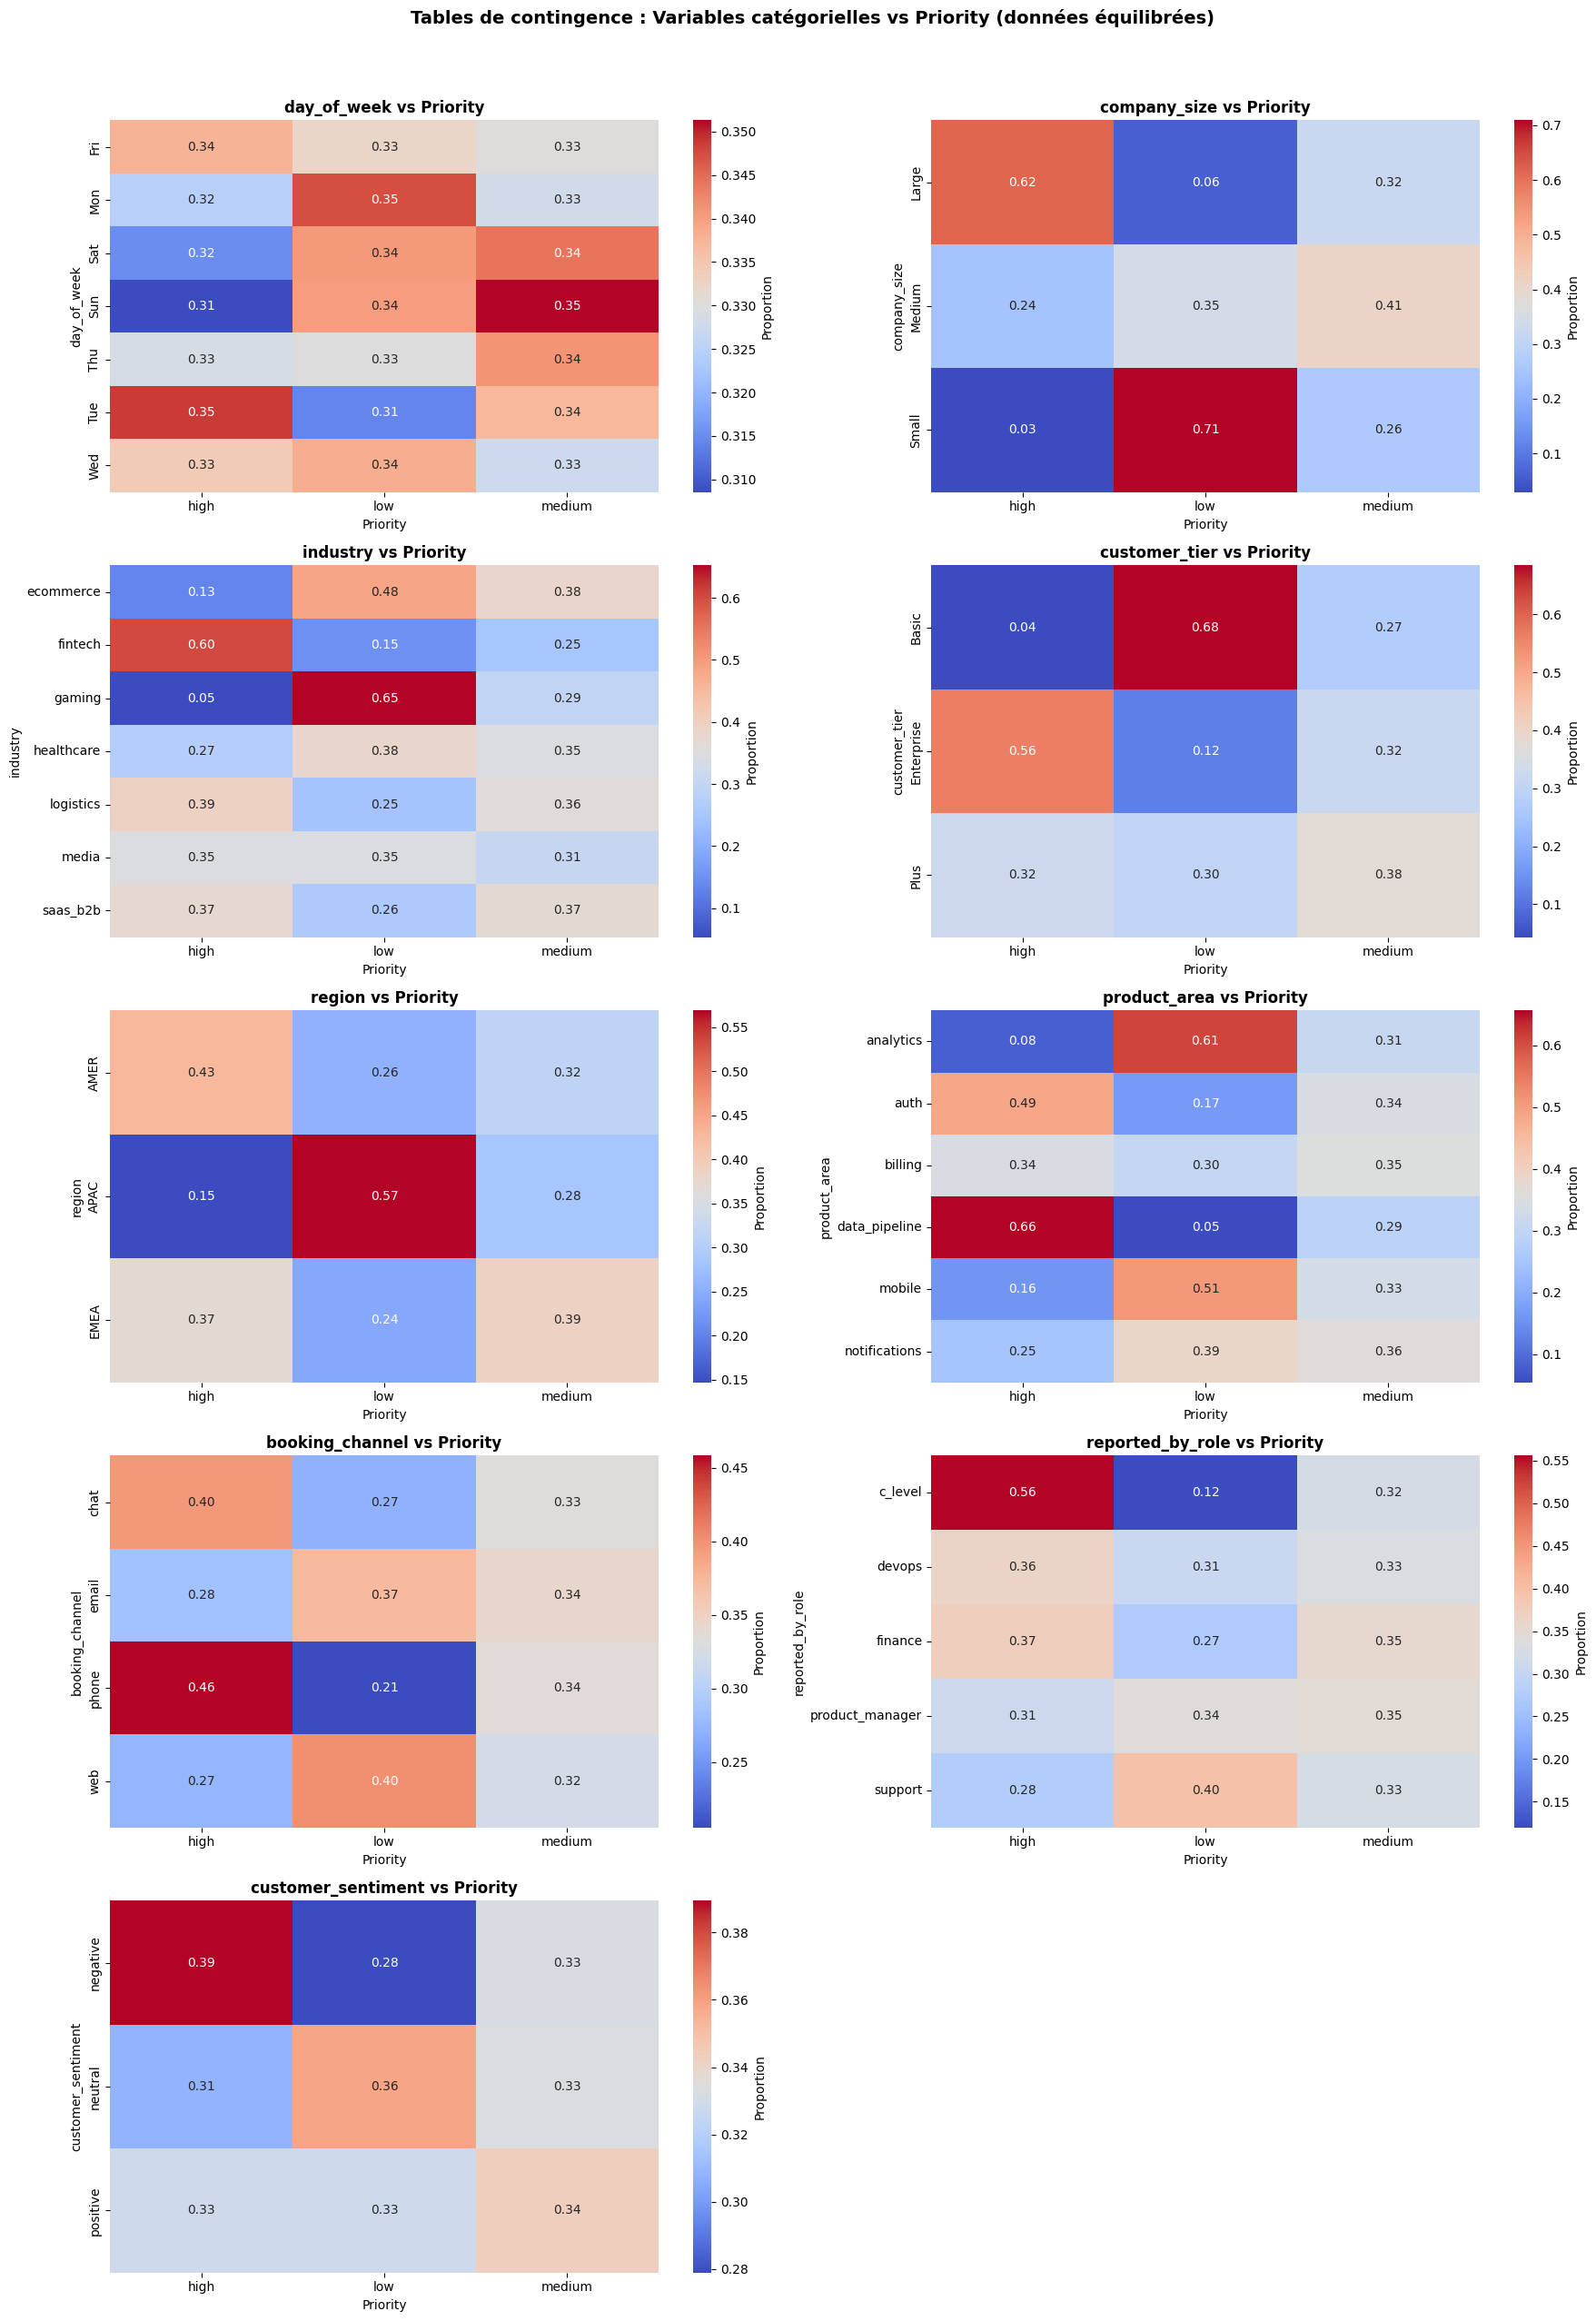

In [17]:
# Créer les heatmaps avec les données équilibrées
n_cols = 2
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

for idx, col in enumerate(categorical_cols):
    # Créer la table de contingence sur les données équilibrées
    crosstab = pd.crosstab(df_balanced[col], df_balanced['priority'], normalize='index')  # Normalisée par ligne (%)
    
    # Créer la heatmap
    sns.heatmap(crosstab, annot=True, fmt='.2f', cmap='coolwarm', 
                ax=axes[idx], cbar_kws={'label': 'Proportion'})
    axes[idx].set_title(f'{col} vs Priority', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Priority', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].tick_params(axis='x', rotation=0)

# Masquer les sous-graphiques vides
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Tables de contingence : Variables catégorielles vs Priority (données équilibrées)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Conclusion
Features les plus corrélées avec les priority hight :  
    • reported_by_role (surtout C-level)  
    • industry (fintech en particulier)  
    • company_size (grandes entreprises)  
    • customer_tier (contrats Enterprise)  
    • product_area (data_pipeline)  
    • security_incident_flag, data_loss_flag (incidents critiques)  

Feature engineering possible pour améliorer les performances :  
    • Ratio customers_affected / org_users (impact relatif)  
    • Indicateur past_90d_incidents > threshold (client problématique)  
    • Combinaison security_incident_flag OR data_loss_flag (incident critique)  
    • Catégorie de description_length (court/moyen/long)  
